In [1]:
from sklearn import covariance, cluster
from pandas_datareader import data, wb
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
# read csv as dict
csvFile = open("./data/stock_normalize_norm.csv", "r")
reader = csv.reader(csvFile)

# create empty dict
count = 0
index = []
data = []
result = {}
for item in reader:
    # ignore first row
    if reader.line_num == 1:
        del item[0]
        Col = item
        continue
    index.append(item[0])
    del item[0]
    data.append(item)
    count +=1 
        
stock = pd.DataFrame(data,
              index=index,
              columns=Col)
stock = stock.astype(float)
csvFile.close()
stock.head()

,AAN,ABAX,ABMD,ABT,ABX,ACET,ADBE,ADM,AEGN,AEM,...,WWD,WWW,X,XEL,XOM,XRAY,YPF,YRCW,YUM,ZEUS
1998-01-05,-0.641715,1.907774,0.083369,0.327521,-1.984440,0.977891,0.457118,0.131820,-0.533056,-0.722183,...,-0.030426,0.616826,-0.121485,-0.519989,-0.744672,-2.314214,-0.805117,0.826012,-1.596920,-0.203968
1998-01-06,1.219500,-1.941550,0.280187,-1.102872,-1.829686,-1.201930,1.126426,-1.173207,0.124245,-0.739046,...,0.137050,0.504017,-0.362307,-0.844005,-2.380402,1.003817,-2.582209,-0.049731,-2.235194,0.991928
1998-01-07,-1.888693,-0.016888,0.853118,0.391300,0.531922,-0.011337,-0.543878,2.980846,0.385805,0.351066,...,-0.197903,-0.849168,0.830145,-0.596420,2.007709,-1.053165,0.537549,-0.509693,-0.150545,0.192127
1998-01-08,-1.311663,0.639195,0.454463,0.803069,-2.600052,-0.828892,0.287041,-0.289298,0.509572,-0.747785,...,-0.030426,-1.847069,-0.061259,0.112616,-1.433340,-0.414981,-2.169018,-0.615202,-2.091671,1.498852
1998-01-09,-0.018369,-0.016888,-1.752019,-0.740803,-0.716373,-0.637734,-0.810839,-1.279706,-0.786569,-1.537140,...,-0.030426,-1.704048,-2.644364,-0.600951,-1.604123,-2.968239,-1.144403,-0.144728,0.091578,-0.368826


In [26]:
print type(stock['ALXN'][1])
print (stock['ALXN'][1])
# print open.iloc[:3, 1:3]
print stock.std(0)

<type 'numpy.float64'>
0.265617360504239
AAN      1.0
ABAX     1.0
ABMD     1.0
ABT      1.0
ABX      1.0
ACET     1.0
ADBE     1.0
ADM      1.0
AEGN     1.0
AEM      1.0
AEP      1.0
AGCO     1.0
AGX      1.0
AIR      1.0
AIT      1.0
AKO.A    1.0
AKO.B    1.0
ALB      1.0
ALCO     1.0
ALG      1.0
ALOG     1.0
ALV      1.0
ALXN     1.0
AMAG     1.0
AMGN     1.0
AMSC     1.0
AMWD     1.0
ANIK     1.0
AOS      1.0
APA      1.0
        ... 
VLGEA    1.0
VLO      1.0
VMI      1.0
VOXX     1.0
VRTX     1.0
WAB      1.0
WAT      1.0
WBK      1.0
WDFC     1.0
WEN      1.0
WERN     1.0
WEYS     1.0
WFC      1.0
WMB      1.0
WMK      1.0
WOR      1.0
WPP      1.0
WST      1.0
WTR      1.0
WTS      1.0
WWD      1.0
WWW      1.0
X        1.0
XEL      1.0
XOM      1.0
XRAY     1.0
YPF      1.0
YRCW     1.0
YUM      1.0
ZEUS     1.0
Length: 465, dtype: float64


In [29]:
x = stock/stock.std(0)
edge_model = covariance.GraphLassoCV()
edge_model.fit(x)
centers, labels = cluster.affinity_propagation(edge_model.covariance_)

In [23]:
stock_tmp = stock.xs(2)
print(type(stock_tmp))

KeyError: 2

In [30]:
print type(centers)
col_center = []
for i in centers:
    col_center.append(Col[i])
print col_center

<type 'numpy.ndarray'>
['AAN', 'ABMD', 'ABX', 'AEGN', 'AKO.B', 'ALOG', 'AMAG', 'APA', 'AZN', 'BHP', 'BIO', 'BLL', 'BMS', 'BPL', 'BPT', 'BWA', 'CAG', 'CAL', 'CL', 'COKE', 'COP', 'CPE', 'CRZO', 'CTWS', 'DE', 'EAT', 'ED', 'EIX', 'EL', 'ETP', 'FOE', 'GEF', 'GEL', 'GPK', 'GWW', 'IART', 'IDXX', 'INTC', 'JJSF', 'JPM', 'KAMN', 'KEX', 'KWR', 'LAWS', 'LAYN', 'LEG', 'LXU', 'LYTS', 'MCD', 'MDT', 'MERC', 'MSEX', 'MTW', 'MTZ', 'NATH', 'NC', 'NTZ', 'NUE', 'NWN', 'OFIX', 'OSUR', 'PFE', 'PH', 'PHX', 'PKX', 'PX', 'RDC', 'RES', 'RPM', 'S', 'SENEB', 'SJM', 'SUN', 'TD', 'TOT', 'TRN', 'TRP', 'UL', 'UNP', 'VAR', 'VFC', 'VMI', 'WERN', 'XRAY']


In [31]:
n_labels = labels.max()
print 'Centers :', ', '.join( col_center )

for i in range(n_labels + 1):
    print('Cluster %i: %s' %
          ((i + 1), ', '.join([Col[key]
                               for key in range(len(labels)) 
                               if labels[key]==i])))

Centers : AAN, ABMD, ABX, AEGN, AKO.B, ALOG, AMAG, APA, AZN, BHP, BIO, BLL, BMS, BPL, BPT, BWA, CAG, CAL, CL, COKE, COP, CPE, CRZO, CTWS, DE, EAT, ED, EIX, EL, ETP, FOE, GEF, GEL, GPK, GWW, IART, IDXX, INTC, JJSF, JPM, KAMN, KEX, KWR, LAWS, LAYN, LEG, LXU, LYTS, MCD, MDT, MERC, MSEX, MTW, MTZ, NATH, NC, NTZ, NUE, NWN, OFIX, OSUR, PFE, PH, PHX, PKX, PX, RDC, RES, RPM, S, SENEB, SJM, SUN, TD, TOT, TRN, TRP, UL, UNP, VAR, VFC, VMI, WERN, XRAY
Cluster 1: AAN, BSET, GOGL, TUP, USAK
Cluster 2: ABMD, DGX, FDP, MLR, UNF
Cluster 3: ABX, AEM, BVN, HWKN, NEM, RGLD
Cluster 4: ABT, AEGN, GPX, QDEL
Cluster 5: AKO.A, AKO.B, ARWR, COO, MMSI, PBT, UHAL
Cluster 6: ALOG, FGP, GILD
Cluster 7: AMAG, IMKTA, WDFC
Cluster 8: ABAX, APA, APC, COG, CRK, DAVE, DVN, EOG, EQT, KO, MDR, MUR, NBL, NFX, PDCE, PEP, PXD, RRC, SGY, SM, TMO
Cluster 9: AZN, GSK, MNRO, SLGN
Cluster 10: BHP, CCJ, CLF, GSH, RIO, SSL, TWI, WBK
Cluster 11: ATR, BIO, MOG.A, STLY
Cluster 12: BLL, KSU, NEU
Cluster 13: AIT, BMS, IP, SON
Cluster 14:

# Draw plot

19
[-2894.526690111734, -3458.389011403475, -2410.472177808319, -2721.6393222976076, -3955.727218879776, -2027.1240759736081]


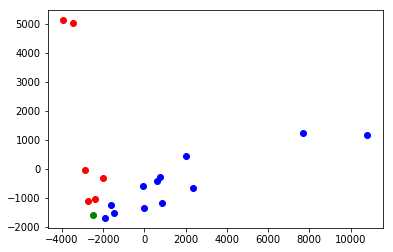

In [42]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)             #输出两维
newData = pca.fit_transform(stock.transpose())   #载入N维
print len(newData[:,0])
x1 = [newData[key,0]
      for key in range(len(labels)) if labels[key]==0]
y1 = [newData[key,1]
      for key in range(len(labels)) if labels[key]==0]
x2 = [newData[key,0]
      for key in range(len(labels)) if labels[key]==1]
y2 = [newData[key,1]
      for key in range(len(labels)) if labels[key]==1]
x3 = [newData[key,0]
      for key in range(len(labels)) if labels[key]==2]
y3 = [newData[key,1]
      for key in range(len(labels)) if labels[key]==2]
print x1
plt.plot(x1, y1, 'or') 
plt.plot(x2, y2, 'og')
plt.plot(x3, y3, 'ob')
plt.show()